In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scores = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TSFTask/student_scored.csv')
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


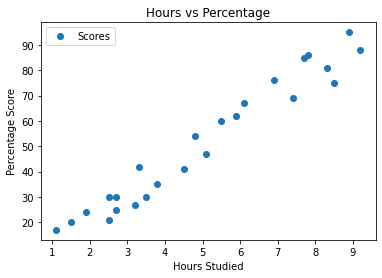

In [3]:
scores.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [4]:
x=scores.iloc[:,:-1].values
y=scores.iloc[:,-1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

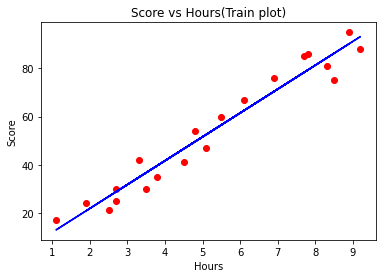

In [7]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.title('Score vs Hours(Train plot)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [8]:
print(x_test)
y_pred=lr.predict(x_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
hours = 9.25
own_pred = lr.predict(np.array([hours]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


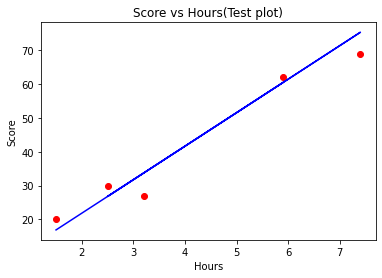

In [14]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title('Score vs Hours(Test plot)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [15]:
import sklearn.metrics as met
mse=met.mean_squared_error(y_test,y_pred)
print('MSE:',mse)
mae=met.mean_absolute_error(y_test,y_pred)
print('MAE:', mae)
r2=met.r2_score(y_test,y_pred)
print('R-square_score:',r2)
rmse=np.sqrt(mse)
print('RMSE:', rmse)

MSE: 21.598769307217456
MAE: 4.183859899002982
R-square_score: 0.9454906892105354
RMSE: 4.647447612100373
